In [1]:
# 1. data preparation
# 1.1 import libraries
# 1.2 import data

In [2]:
# for data manipulation
import math
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import datetime as dt
from scipy import stats as st

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for machine learning
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN

# for supervised learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.feature_selection import RFE

# for unsupervised learning
from kmodes.kmodes import KModes

# for model evaluation
from sklearn import metrics
from sklearn.metrics import (accuracy_score, precision_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve, average_precision_score, f1_score, recall_score, silhouette_score,
                             ConfusionMatrixDisplay, auc)

# warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import data
df = pd.read_excel("data/credit card_defaults.xlsx")

***

In [4]:
# 2. data exploration and visualization
# 2.1 data exploration
# 2.2 descriptive statistics, outliers and distribution/variance of data
# 2.3 correlations between variables

In [5]:
# preview data - head
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment this month
0,1,20000,2,2,1,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
# preview data - tail
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment this month
29995,29996,220000,1,3,1,39,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [7]:
# data shape
df.shape

(30000, 19)

In [8]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   BILL_AMT1                   30000 non-null  int64
 7   BILL_AMT2                   30000 non-null  int64
 8   BILL_AMT3                   30000 non-null  int64
 9   BILL_AMT4                   30000 non-null  int64
 10  BILL_AMT5                   30000 non-null  int64
 11  BILL_AMT6                   30000 non-null  int64
 12  PAY_AMT1                    30000 non-null  int64
 13  PAY_AMT2                    30000 non-null  int64
 14  PAY_AM

In [9]:
# check missing values
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment this month    0
dtype: int64

In [10]:
# check duplicate values
df.duplicated().sum()

0

In [11]:
# rename `default payment this month` to `RESPONSE`
df = df.rename(columns={'default payment this month':'RESPONSE'})

# check changes made
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'RESPONSE'],
      dtype='object')

In [12]:
# describe data - RESPONSE
df['RESPONSE'].value_counts(normalize=True)

RESPONSE
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [13]:
# describe data - SEX
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

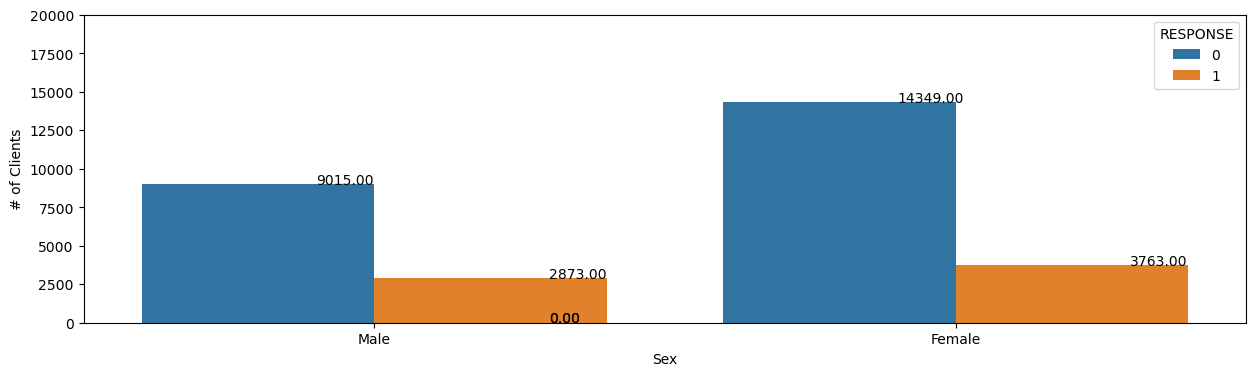

In [14]:
# barplot - SEX
plt.figure(figsize=(15,4))

ax = sns.countplot(data = df, x = 'SEX', hue="RESPONSE")

plt.xlabel("Sex")
plt.ylabel("# of Clients")
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'])
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03))
plt.show()

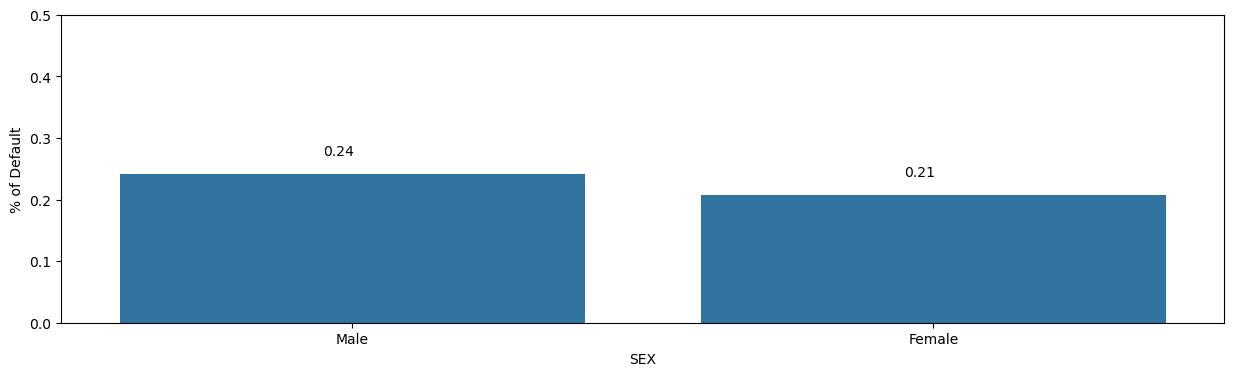

In [15]:
# barplot - SEX
plt.figure(figsize=(15,4))
ax = sns.barplot(x="SEX", y="RESPONSE", data=df, ci=None)

plt.ylabel("% of Default")
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'])

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03))

plt.show()

In [16]:
# describe data - EDUCATION
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [17]:
# squeeze 'others' into 4/5/6 to reduce variance in EDUCATION column - reduce underfitting
df['EDUCATION'] = df['EDUCATION'].replace([0, 4, 5, 6], 4)

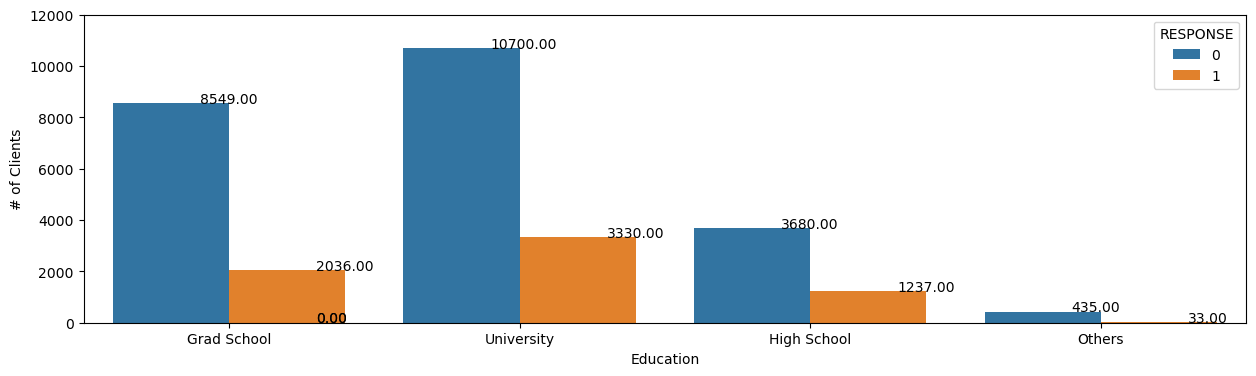

In [18]:
# barplot - EDUCATION
plt.figure(figsize=(15,4))
ax = sns.countplot(data=df, x='EDUCATION', hue="RESPONSE")

plt.xlabel("Education")
plt.ylabel("# of Clients")
plt.ylim(0,12000)
plt.xticks([0,1,2,3],['Grad School','University','High School','Others'])
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03))
plt.show()

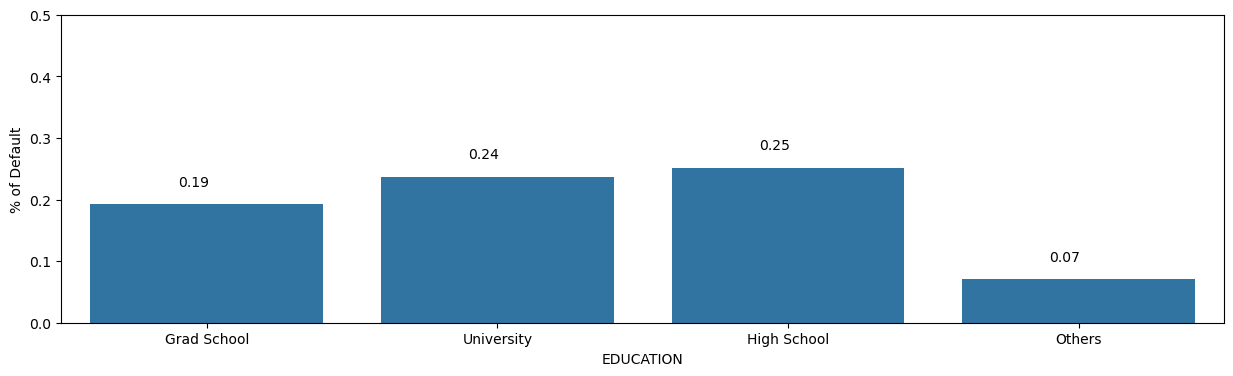

In [19]:
# barplot - EDUCATION 
plt.figure(figsize=(15,4))
ax = sns.barplot(x="EDUCATION", y="RESPONSE", data=df, ci=None)

plt.ylabel("% of Default")
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Grad School','University','High School','Others'])

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03))

plt.show()

In [20]:
# describe data - MARRIAGE
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

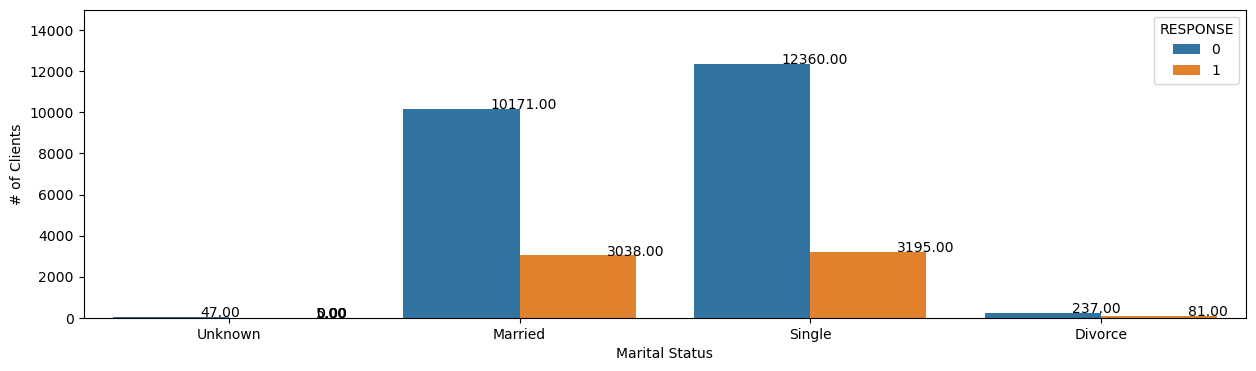

In [54]:
# barplot - MARRIAGE
plt.figure(figsize=(15,4))
ax = sns.countplot(data=df, x='MARRIAGE', hue="RESPONSE")

plt.xlabel("Marital Status")
plt.ylabel("# of Clients")
plt.ylim(0,15000)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'])
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03))
plt.show()

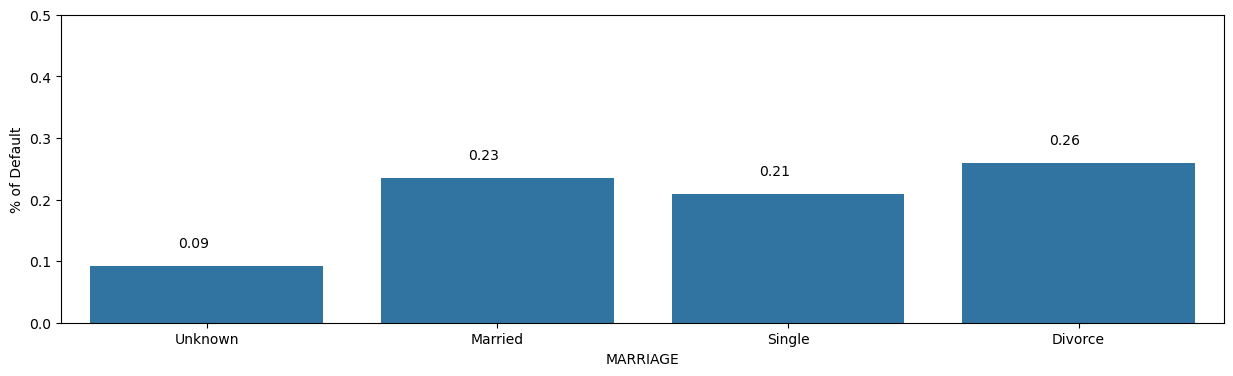

In [22]:
# barplot - MARRIAGE
plt.figure(figsize=(15,4))
ax = sns.barplot(data=df, x="MARRIAGE", y="RESPONSE", ci=None)

plt.ylabel("% of Default")
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'])

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03))

plt.show()

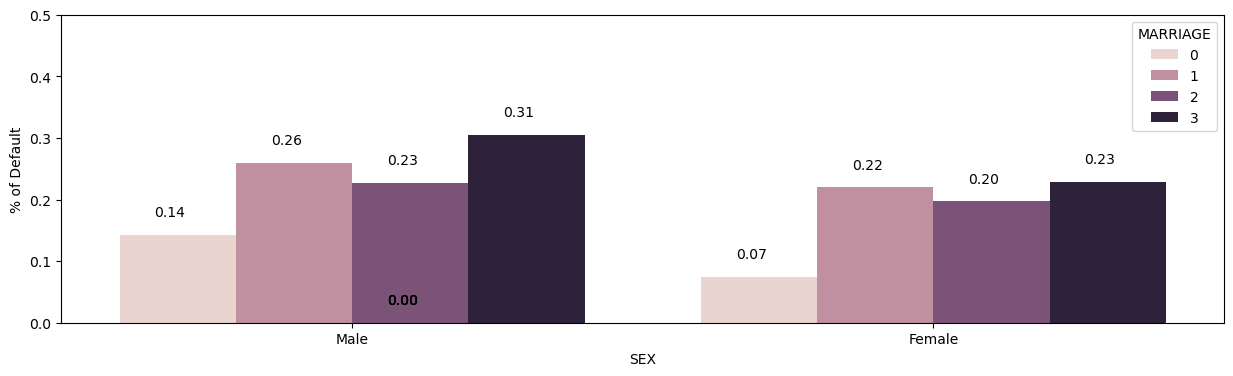

In [23]:
# barplot SEX/MARRIAGE
plt.figure(figsize=(15,4))
ax = sns.barplot(data=df, x="SEX", y="RESPONSE", hue="MARRIAGE", ci=None)

plt.ylabel("% of Default")
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'])

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03))

plt.show()

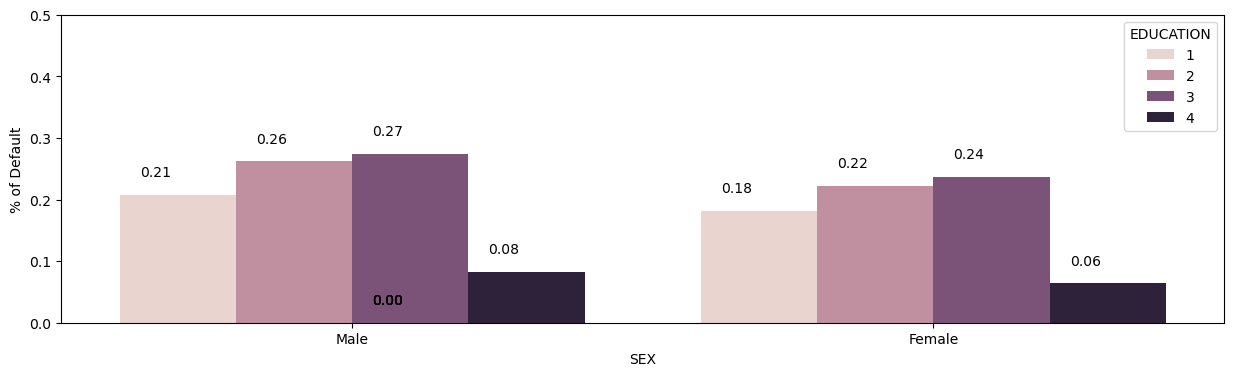

In [24]:
# barplot - SEX/GENDER 
plt.figure(figsize=(15,4))
ax = sns.barplot(data=df, x="SEX", y="RESPONSE", hue="EDUCATION", ci=None)

plt.ylabel("% of Default")
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'])

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.035, p.get_height()+0.03))

plt.show()

In [25]:
# describe data - AGE
df[['AGE']].describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,30000.0,35.4855,9.217904,21.0,28.0,34.0,41.0,79.0


In [26]:
# create new column for visualization 
df['AGEBIN'] = pd.cut(df['AGE'],[20,25, 30, 35, 40, 50, 60, 80])
df['AGEBIN'] = df['AGEBIN'].astype('str')
df['AGEBIN'] = df['AGEBIN'].replace({'(20, 25]':'21-25',
                                     '(25, 30]':'26-30',
                                     '(30, 35]':'31-35',
                                     '(35, 40]':'36-40',
                                     '(40, 50]':'41-50',
                                     '(50, 60]':'51-60',
                                     '(60, 80]':'61-80'
                                    })
agebin_order = ['21-25', '26-30', '31-35', '36-40', '41-50', '51-60', '61-80']

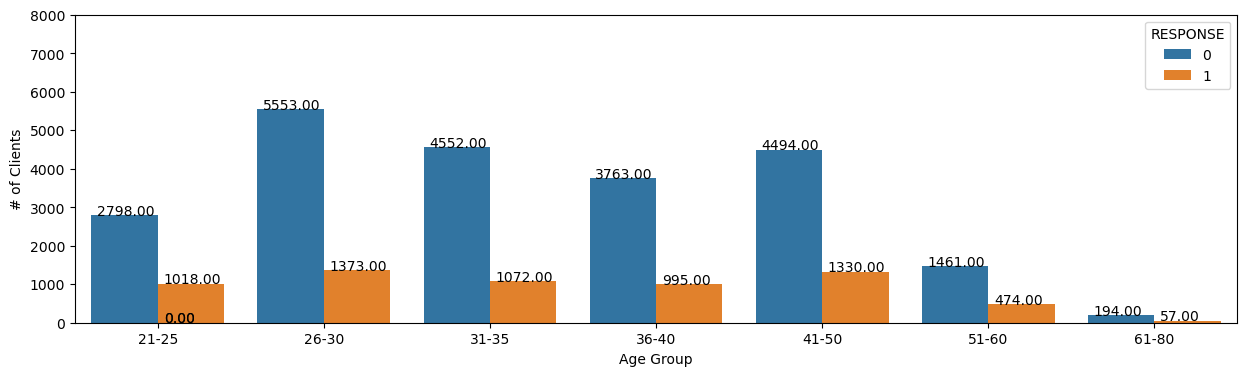

In [55]:
# barplot - AGE
plt.figure(figsize=(15,4))
ax = sns.countplot(data=df, x='AGEBIN', hue="RESPONSE", order=agebin_order)

plt.xlabel("Age Group")
plt.ylabel("# of Clients")
plt.ylim(0,8000)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.035, p.get_height()+0.03))
plt.show()

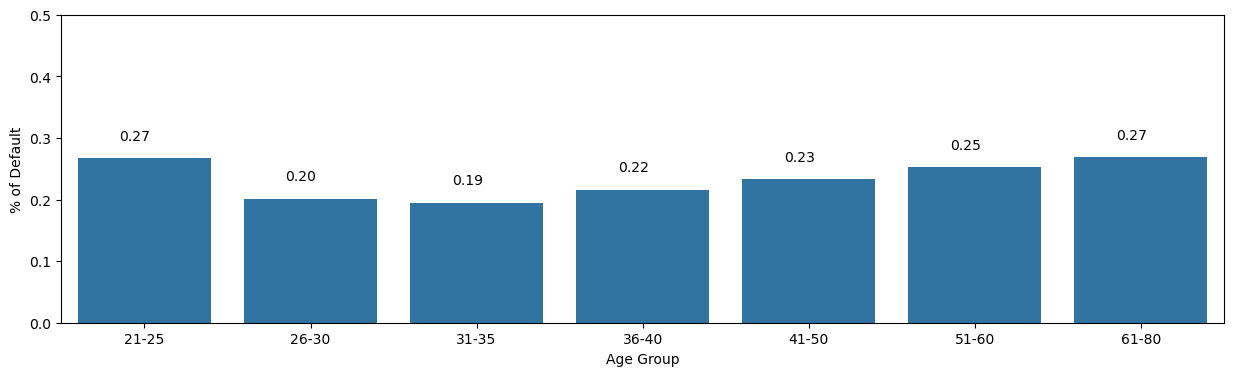

In [28]:
# barplot - AGE
plt.figure(figsize=(15,4))
ax = sns.barplot(data=df, x="AGEBIN", y="RESPONSE", ci=None, order=agebin_order)

plt.xlabel("Age Group")
plt.ylabel("% of Default")
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03))

plt.show()

In [29]:
# describe data - LIMIT BAL
df[['LIMIT_BAL']].describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.0,140000.0,240000.0,1000000.0


<Axes: title={'center': 'Bill Amount'}, xlabel='LIMIT_BAL'>

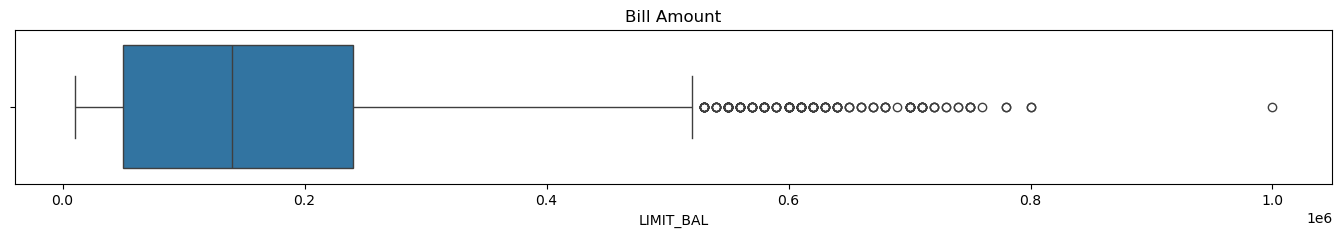

In [30]:
# boxplot - LIMIT BAL
plt.figure(figsize=(17,2))
plt.title('Bill Amount')
sns.boxplot(x=df['LIMIT_BAL'])

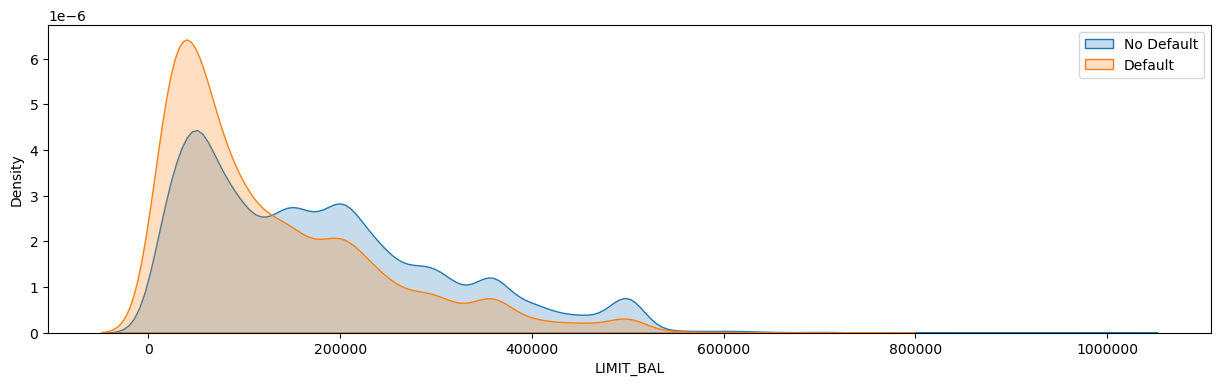

In [31]:
# kde dsitribution plot - LIMIT BAL
plt.figure(figsize=(15,4))
sns.kdeplot(df.loc[(df['RESPONSE']==0), 'LIMIT_BAL'], label='No Default', shade=True)
sns.kdeplot(df.loc[(df['RESPONSE']==1), 'LIMIT_BAL'], label='Default', shade=True)
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('Density')
plt.legend()
plt.show()

In [32]:
# describe data - BILL AMT
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe().T

,count,mean,std,min,25%,50%,75%,max
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
BILL_AMT4,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
BILL_AMT5,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0
BILL_AMT6,30000.0,38871.760400,59554.107537,-339603.0,1256.00,17071.0,49198.25,961664.0


In [33]:
# check how many bill amounts are negative
# note that 6.4% of the data contains negative bill numbers
# rule of thumb: if 5% or less or data is affected we can delete it without significant repercussions. 6.4% is however, over that threshold
# we will keep this data and assume that it is not a mistake in data entry (data dictionary doesnt clarify it either)
df[(df["BILL_AMT1"]<0) | (df["BILL_AMT2"]<0) | (df["BILL_AMT3"]<0) | (df["BILL_AMT4"]<0) | (df["BILL_AMT5"]<0) | (df["BILL_AMT6"]<0)].shape[0]/30000 * 100

6.433333333333334

<Axes: title={'center': 'Bill Amount'}, xlabel='value', ylabel='variable'>

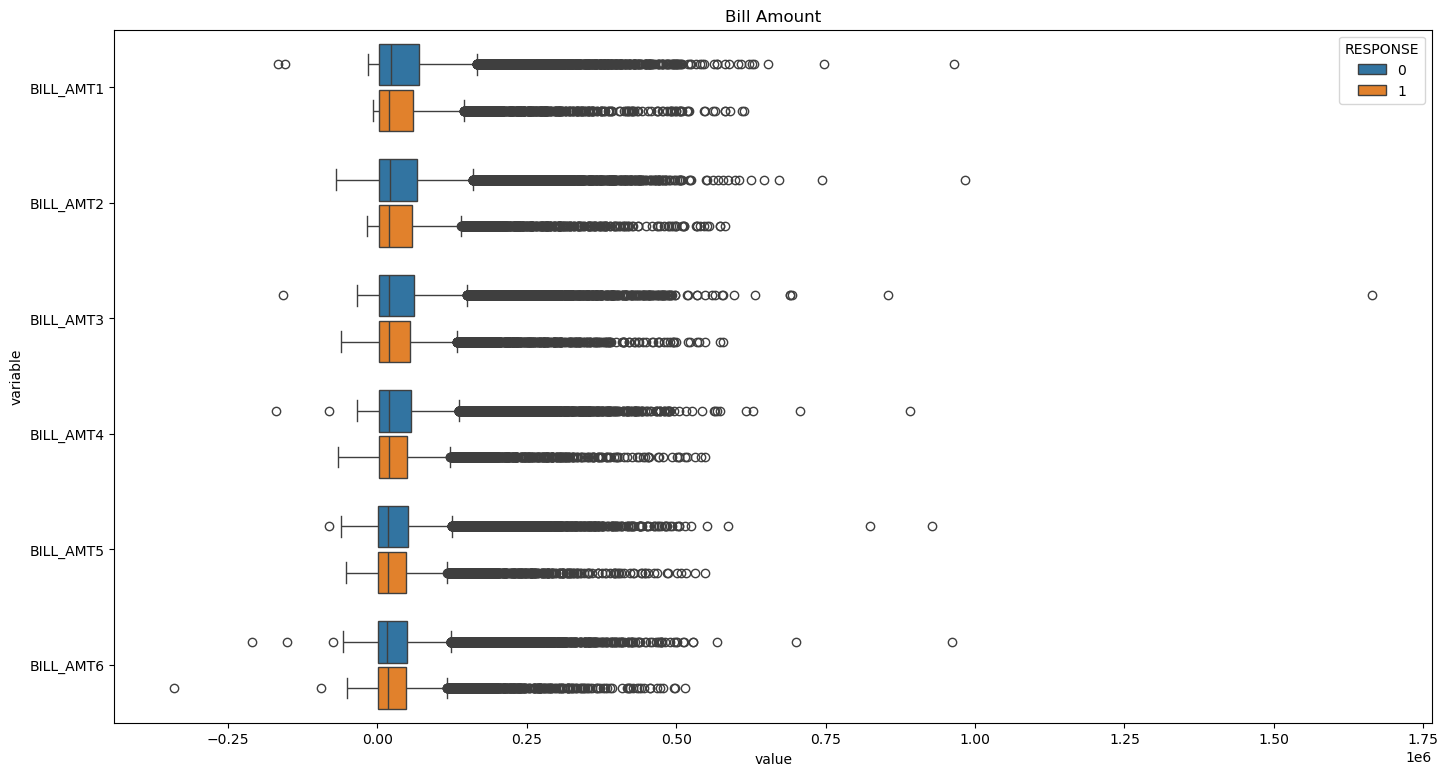

In [34]:
# box and whiskers plot - BILL AMT
# melt to transform from wide to long
billamt_df = pd.melt(df, id_vars=['RESPONSE'], 
                         value_vars=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])

# boxplot
plt.figure(figsize=(17,9))
plt.title('Bill Amount')
sns.boxplot(data=billamt_df, x="value", y="variable", hue="RESPONSE", gap=.1)

In [35]:
# null hypothesis: the mean BILL_AMTn for defaulters and non-defaulters are the same
# alternative Hypothesis: the mean BILL_AMTn for defaulters and non-defaulters are different

cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

for col in cols:
    # create data sample
    sample_0 = np.asarray(df[[col, 'RESPONSE']].query('RESPONSE == 0')[col].to_list())
    sample_1 = np.asarray(df[[col, 'RESPONSE']].query('RESPONSE == 1')[col].to_list())

    # define significance level
    alpha = 0.05 

    # test for equality of variances
    lv = st.levene(sample_0, sample_1)
    if lv.pvalue > alpha: param = True
    else: param = False

    # t-test for differences in sample mean
    results = st.ttest_ind(sample_0, sample_1, equal_var=param)

    # print results
    print('p-value:', results.pvalue)
    if results.pvalue < alpha: print(col, " Reject the null hypothesis")
    else: print(col, " Failed to reject null hypothesis")

p-value: 0.0006818917909820554
BILL_AMT1  Reject the null hypothesis
p-value: 0.014437287107299357
BILL_AMT2  Reject the null hypothesis
p-value: 0.013945446092169167
BILL_AMT3  Reject the null hypothesis
p-value: 0.07864210364628092
BILL_AMT4  Failed to reject null hypothesis
p-value: 0.24163444291382874
BILL_AMT5  Failed to reject null hypothesis
p-value: 0.3521225212306479
BILL_AMT6  Failed to reject null hypothesis


In [36]:
# describe data - PAY AMT
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe().T

,count,mean,std,min,25%,50%,75%,max
PAY_AMT1,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0
PAY_AMT2,30000.0,5921.163500,23040.870402,0.0,833.00,2009.0,5000.00,1684259.0
PAY_AMT3,30000.0,5225.681500,17606.961470,0.0,390.00,1800.0,4505.00,896040.0
PAY_AMT4,30000.0,4826.076867,15666.159744,0.0,296.00,1500.0,4013.25,621000.0
PAY_AMT5,30000.0,4799.387633,15278.305679,0.0,252.50,1500.0,4031.50,426529.0
PAY_AMT6,30000.0,5215.502567,17777.465775,0.0,117.75,1500.0,4000.00,528666.0


<Axes: title={'center': 'Pay Amount'}, xlabel='value', ylabel='variable'>

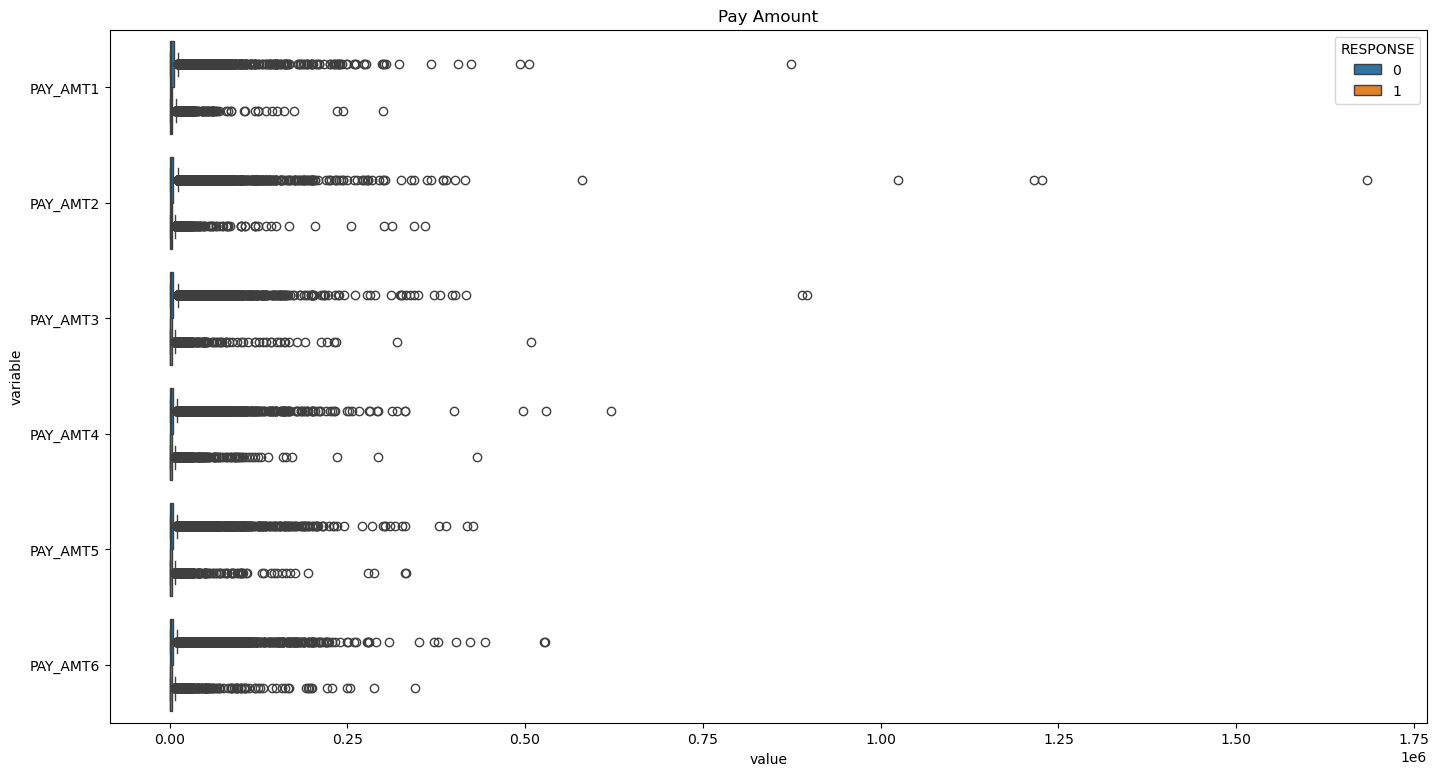

In [37]:
# box and whiskers plot - PAY AMT
# melt to transform from wide to long
payamt_df = pd.melt(df, id_vars=['RESPONSE'],
                        value_vars=['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

# boxplot
plt.figure(figsize=(17,9))
plt.title('Pay Amount')
sns.boxplot(data=payamt_df, 
            x="value", 
            y="variable", 
            hue="RESPONSE")

In [38]:
# null hypothesis: the mean PAY_AMTn for defaulters and non-defaulters are the same
# alternative Hypothesis: the mean PAY_AMTn for defaulters and non-defaulters are different

cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for col in cols:
    # create data sample
    sample_0 = np.asarray(df[[col, 'RESPONSE']].query('RESPONSE == 0')[col].to_list())
    sample_1 = np.asarray(df[[col, 'RESPONSE']].query('RESPONSE == 1')[col].to_list())

    # define significance level
    alpha = 0.05 

    # test for equality of variances
    lv = st.levene(sample_0, sample_1)
    if lv.pvalue > alpha: param = True
    else: param = False

    # t-test for differences in sample mean
    results = st.ttest_ind(sample_0, sample_1, equal_var=param)

    # print results
    print('p-value:', results.pvalue)
    if results.pvalue < alpha: print(col, " Reject the null hypothesis")
    else: print(col, " Failed to reject null hypothesis")

p-value: 3.545865445389816e-68
PAY_AMT1  Reject the null hypothesis
p-value: 1.881973589300767e-49
PAY_AMT2  Reject the null hypothesis
p-value: 1.7806163840307253e-32
PAY_AMT3  Reject the null hypothesis
p-value: 3.374781271312631e-34
PAY_AMT4  Reject the null hypothesis
p-value: 3.235771852861752e-29
PAY_AMT5  Reject the null hypothesis
p-value: 2.591373407189126e-28
PAY_AMT6  Reject the null hypothesis


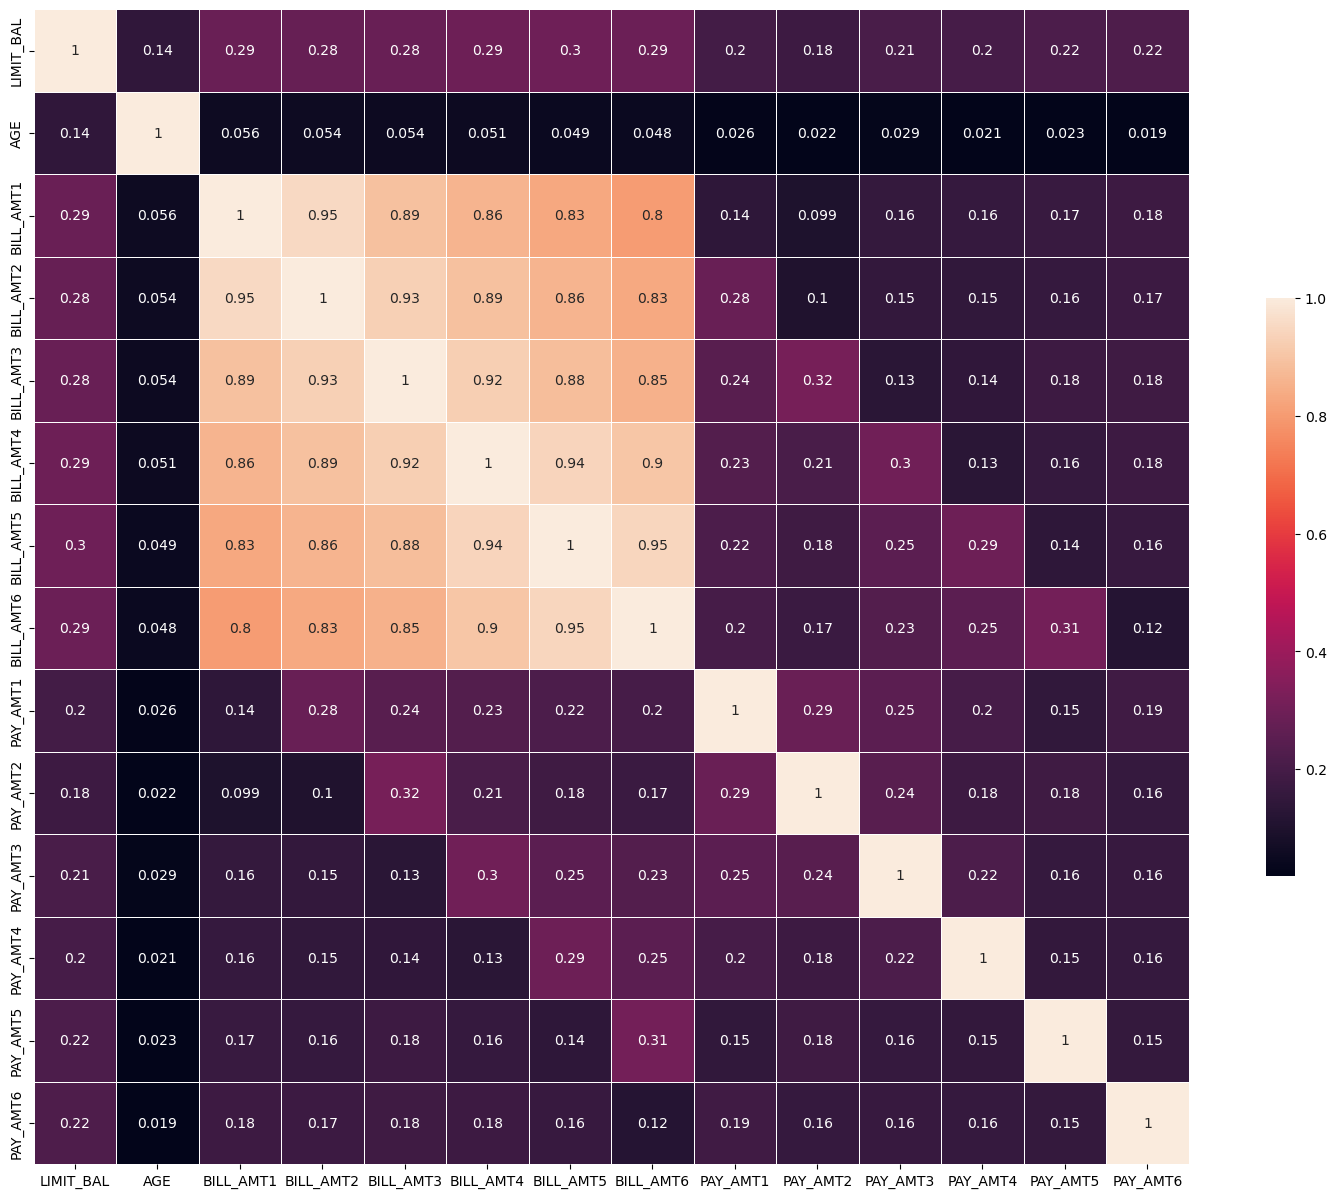

In [39]:
# correlation matrix
df_num = df.drop(columns=['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGEBIN', 'RESPONSE']) # remove categorical variables

plt.subplots(figsize=(20,15))
sns.heatmap(df_num.corr(), square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [40]:
# check for inactive customers
# we shouldn't use this data because there's nothing to predict on
inactive = df[(df['BILL_AMT1']==0) & (df['BILL_AMT2']==0) & (df['BILL_AMT3']==0) & 
              (df['BILL_AMT4']==0) & (df['BILL_AMT5']==0) &(df['BILL_AMT6']==0)]
inactive.shape
# drop index of inactive customers
df = df.drop(inactive.index).reset_index().drop(columns='index')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,RESPONSE,AGEBIN
0,1,20000,2,2,1,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,21-25
1,2,120000,2,2,2,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,26-30
2,3,90000,2,2,2,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,31-35
3,4,50000,2,2,1,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,36-40
4,5,50000,1,2,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29129,29996,220000,1,3,1,39,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,36-40
29130,29997,150000,1,3,2,43,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,41-50
29131,29998,30000,1,2,2,37,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,36-40
29132,29999,80000,1,3,1,41,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,41-50


***

In [41]:
# 3. data transformation and feature engineering

In [42]:
# create new feature - BILL_AMT_TOTAL
# total bill amount over last 6 mo
df['BILL_AMT_TOTAL'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)
# check changes
df.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,RESPONSE,AGEBIN,BILL_AMT_TOTAL
0,1,20000,2,2,1,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,21-25,7704


In [43]:
# create new feature - PAY_AMT_TOTAL
# total payment amount over last 6 mo
df['PAY_AMT_TOTAL'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)
# check changes
df.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,RESPONSE,AGEBIN,BILL_AMT_TOTAL,PAY_AMT_TOTAL
0,1,20000,2,2,1,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,21-25,7704,689


In [44]:
# create new feature - OUTS_AMT_TOTAL
# outstanding bill amount over last 6 mo
df['OUTS_AMT_TOTAL'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1) \
                       - df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)
# check changes
df.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,RESPONSE,AGEBIN,BILL_AMT_TOTAL,PAY_AMT_TOTAL,OUTS_AMT_TOTAL
0,1,20000,2,2,1,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,21-25,7704,689,7015


In [45]:
# create new feature - PAST_DEFAULTS
# number of defaulted payments (PAY_AMTn = 0) over last 6 mo
df['PAST_DEFAULTS'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].apply(lambda x: (x == 0).sum(), axis=1)
df.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,RESPONSE,AGEBIN,BILL_AMT_TOTAL,PAY_AMT_TOTAL,OUTS_AMT_TOTAL,PAST_DEFAULTS
0,1,20000,2,2,1,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,21-25,7704,689,7015,5


In [46]:
# create new feature - EXCEED_LIMIT_BAL
# number of times exceeded limit balance over last 6 mo
# df[df['BILL_AMT1']>df['LIMIT_BAL']]
df['EXCEED_LIMIT_BAL'] = df[['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']] \
                        .apply(lambda col: sum([val > list(col)[0] for idx, val in enumerate(list(col))]), axis=1)
# check changes
df.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,RESPONSE,AGEBIN,BILL_AMT_TOTAL,PAY_AMT_TOTAL,OUTS_AMT_TOTAL,PAST_DEFAULTS,EXCEED_LIMIT_BAL
0,1,20000,2,2,1,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,21-25,7704,689,7015,5,0


In [47]:
# convert data types - SEX, EDUCATION, MARRIAGE
df2 = df.copy()
dtype= {'SEX'       : 'category', 
        'EDUCATION' : 'category',
        'MARRIAGE'  : 'category'}

df2 = df2.astype(dtype)

In [48]:
# one-hot encoding
df3 = pd.get_dummies(df2)
df3.head(1)

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,RESPONSE,BILL_AMT_TOTAL,PAY_AMT_TOTAL,OUTS_AMT_TOTAL,PAST_DEFAULTS,EXCEED_LIMIT_BAL,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,AGEBIN_21-25,AGEBIN_26-30,AGEBIN_31-35,AGEBIN_36-40,AGEBIN_41-50,AGEBIN_51-60,AGEBIN_61-80
0,1,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704,689,7015,5,0,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False


In [49]:
df3.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'RESPONSE',
       'BILL_AMT_TOTAL', 'PAY_AMT_TOTAL', 'OUTS_AMT_TOTAL', 'PAST_DEFAULTS',
       'EXCEED_LIMIT_BAL', 'SEX_1', 'SEX_2', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3', 'AGEBIN_21-25', 'AGEBIN_26-30', 'AGEBIN_31-35',
       'AGEBIN_36-40', 'AGEBIN_41-50', 'AGEBIN_51-60', 'AGEBIN_61-80'],
      dtype='object')

In [50]:
# features
feat = ['LIMIT_BAL', 'AGE', 
       'BILL_AMT_TOTAL', 'PAY_AMT_TOTAL', 'OUTS_AMT_TOTAL', 'PAST_DEFAULTS', 'EXCEED_LIMIT_BAL',
       'SEX_1', 'SEX_2',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3']

# train test split
X = df3[feat]
y = df3['RESPONSE']
X, y = SMOTE().fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape)
print(X_test.shape)

(31941, 17)
(13689, 17)


In [51]:
# data scaling
# get numeric columns
num_col = X_train.select_dtypes(include=np.number).columns.tolist()

# scaler
scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.fit_transform(X_test[num_col])

***

In [52]:
# 4. supervised learning - model building and tuning

In [53]:
# supervised learning model - logistic regression
# instantiate model
model = LogisticRegression(random_state=42)

# define hyperparameters
hyperparameters = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                   'C' : np.logspace(-4, 4, 20),
                   'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
                   'max_iter' : [100, 1000,2500, 5000]
                  }

# define scoring metrics
metrics = 'accuracy'

# instantiate randomizedsearch
lr1 = RandomizedSearchCV(model, hyperparameters, scoring=metrics, cv=5, refit='accuracy', verbose = 1, n_jobs = -1)
lr1.fit(X_train, y_train)

# get best model
best_lr1 = lr1.best_estimator_

# generate predictions
y_pred_lr1 = best_lr1.predict(X_train)
y_pred_proba_lr1 = best_lr1.predict_proba(X_train)[:, 1]

# metrics
print("Accuracy:", accuracy_score(y_train, y_pred_lr1))
print("ROC AUC:", roc_auc_score(y_train, y_pred_proba_lr1))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [ ]:
# feature selection - logistic regression
# ranking features with RFE
selector = RFE(best_lr1, n_features_to_select = 1)
selector = selector.fit(X_train, y_train)
# print rankings
lr_feature_ranks = []
for i in selector.ranking_:
    lr_feature_ranks.append(feat[i-1])
lr_feature_ranks

In [ ]:
# supervised learning model - random forest
# instantiate model
model = RandomForestClassifier(random_state=42)

# define hyperparameters
hyperparameters = {'n_estimators'     : [350, 400, 450, 500],
                   'max_features'     : ['auto', 'sqrt'],
                   'max_depth'        : [5, 10, 15, 25, 30],
                   'min_samples_split': [2, 5, 10, 15, 100],
                   'min_samples_leaf' : [1, 2, 5, 10, 15]
                  }

# define scoring metrics
metrics = 'accuracy'

# instantiate randomizedsearch
rf1 = RandomizedSearchCV(model, hyperparameters, scoring=metrics, cv=5, refit='accuracy', verbose = 1, n_jobs = -1)
rf1.fit(X_train, y_train)

# get best model
best_rf1 = rf1.best_estimator_

# generate predictions
y_pred_rf1 = best_rf1.predict(X_train)
y_pred_proba_rf1 = best_rf1.predict_proba(X_train)[:, 1]

# metrics
print("Accuracy:", accuracy_score(y_train, y_pred_rf1))
print("ROC AUC:", roc_auc_score(y_train, y_pred_proba_rf1))

In [ ]:
# feature selection - random forest
importances = best_rf1.feature_importances_
indices = np.argsort(importances)
rf_feature_ranks = [feat[i] for i in indices]

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), rf_feature_ranks)
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# supervised learning model - xgboost
# instantiate the classifier
model = xgb.XGBClassifier(random_state=42)

# create a dictionary of hyperparameters to tune 
hyperparameters = {'n_estimators' : [200, 300, 400, 500],
                   'max_depth'    : [2, 4, 5, 10, 15, 25],
                   'learning_rate': [0.01, 0.05, 0.1, 1]
                  }

# define scoring metrics
metrics = 'accuracy'

# instantiate randomizedsearch
xgb1 = RandomizedSearchCV(model, hyperparameters, scoring=metrics, cv=5, refit='accuracy', verbose = 1, n_jobs = -1)
xgb1.fit(X_train, y_train)

# get best model
best_xgb1 = xgb1.best_estimator_

# generate predictions
y_pred_xgb1 = best_xgb1.predict(X_train)
y_pred_proba_xgb1 = best_xgb1.predict_proba(X_train)[:, 1]

# metrics
print("Accuracy:", accuracy_score(y_train, y_pred_xgb1))
print("ROC AUC:", roc_auc_score(y_train, y_pred_proba_xgb1))

In [ ]:
# feature selection - xgboost
# feature importance plot
feature_important = xgb1.best_estimator_.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

xgb_feature_ranks = pd.DataFrame(data=values, index=keys, columns=["score"]).nlargest(len(feat), columns='score').sort_values(by="score", ascending=True)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(xgb_feature_ranks.index, xgb_feature_ranks['score'], color='b', align='center')
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# feature selection - logistic regression
lr_X, y = SMOTE().fit_resample(X[lr_feature_ranks[:10]],y)
lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(lr_X, y, test_size=0.30, random_state=42)

In [ ]:
# feature selection - random forest
rf_X, y = SMOTE().fit_resample(X[rf_feature_ranks[::-1][:10]],y)
rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(rf_X, y, test_size=0.30, random_state=42)

In [ ]:
# feature selection - xgboost
xgb_X, y = SMOTE().fit_resample(X[xgb_feature_ranks.index[::-1][:7]],y)
xgb_X_train, xgb_X_test, xgb_y_train, xgb_y_test = train_test_split(xgb_X, y, test_size=0.30, random_state=42)

In [ ]:
# model tuning - retrain logistic regression model
# supervised learning model - logistic regression
model = LogisticRegression(random_state=42)

# define hyperparameters
hyperparameters = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                   'C' : np.logspace(-4, 4, 20),
                   'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
                   'max_iter' : [100, 1000,2500, 5000]
                  }

# define scoring metrics
metrics = 'accuracy'

# instantiate randomizedsearch
lr2 = RandomizedSearchCV(model, hyperparameters, scoring=metrics, cv=5, refit='accuracy', verbose = 1, n_jobs = -1)
lr2.fit(lr_X_train, lr_y_train)

# get best model
best_lr2 = lr2.best_estimator_

# generate predictions
y_pred_lr2 = best_lr2.predict(lr_X_train)
y_pred_proba_lr2 = best_lr2.predict_proba(lr_X_train)[:, 1]

# metrics
print("Linear Regression Classifier Metrics with Hyperparameter Tuning:")
print("Best Parameters:", lr2.best_params_)
print("Accuracy:", accuracy_score(lr_y_train, y_pred_lr2))
print("Precision:", precision_score(lr_y_train, y_pred_lr2))
print("Recall:", recall_score(lr_y_train, y_pred_lr2))
print("F1:", f1_score(lr_y_train, y_pred_lr2))
print("ROC AUC:", roc_auc_score(lr_y_train, y_pred_proba_lr2))
print("\nClassification Report:\n", classification_report(lr_y_train, y_pred_lr2))

In [ ]:
# model tuning - retrain random forest model
# supervised learning model - random forest
# instantiate model
model = RandomForestClassifier(random_state=42)

# define hyperparameters
hyperparameters = {'n_estimators'     : [350, 400, 450, 500],
                   'max_features'     : ['auto', 'sqrt'],
                   'max_depth'        : [5, 10, 15, 25, 30],
                   'min_samples_split': [2, 5, 10, 15, 100],
                   'min_samples_leaf' : [1, 2, 5, 10, 15]
                  }

# define scoring metrics
metrics = 'accuracy'

# instantiate randomizedsearch
rf2 = RandomizedSearchCV(model, hyperparameters, scoring=metrics, cv=5, refit='accuracy', verbose = 1, n_jobs = -1)
rf2.fit(rf_X_train, rf_y_train)

# get best model
best_rf2 = rf2.best_estimator_

# generate predictions
y_pred_rf2 = best_rf2.predict(rf_X_train)
y_pred_proba_rf2 = best_rf2.predict_proba(rf_X_train)[:, 1]

# metrics
print("Random Forest Classifier Metrics with Hyperparameter Tuning:")
print("Best Parameters:", rf2.best_params_)
print("Accuracy:", accuracy_score(rf_y_train, y_pred_rf2))
print("Precision:", precision_score(rf_y_train, y_pred_rf2))
print("Recall:", recall_score(rf_y_train, y_pred_rf2))
print("F1:", f1_score(rf_y_train, y_pred_rf2))
print("ROC AUC:", roc_auc_score(rf_y_train, y_pred_proba_rf2))
print("\nClassification Report:\n", classification_report(rf_y_train, y_pred_rf2))

In [ ]:
# model tuning - retrain xgboost model
# supervised learning model - xgboost
# instantiate the classifier
model = xgb.XGBClassifier(random_state=42)

# create a dictionary of hyperparameters to tune 
hyperparameters = {'n_estimators' : [200, 300, 400, 500],
                   'max_depth'    : [2, 4, 5, 10, 15, 25],
                   'learning_rate': [0.01, 0.05, 0.1, 1]
                  }

# define scoring metrics
metrics = 'accuracy'

# instantiate randomizedsearch
xgb2 = RandomizedSearchCV(model, hyperparameters, scoring=metrics, cv=5, refit='accuracy', verbose = 1, n_jobs = -1)
xgb2.fit(xgb_X_train, xgb_y_train)

# get best model
best_xgb2 = xgb2.best_estimator_

# generate predictions
y_pred_xgb2 = best_xgb2.predict(xgb_X_train)
y_pred_proba_xgb2 = best_xgb2.predict_proba(xgb_X_train)[:, 1]

# metrics
print("XGBoost Classifier Metrics with Hyperparameter Tuning:")
print("Best Parameters:", xgb2.best_params_)
print("Accuracy:", accuracy_score(xgb_y_train, y_pred_xgb2))
print("Precision:", precision_score(xgb_y_train, y_pred_xgb2))
print("Recall:", recall_score(xgb_y_train, y_pred_xgb2))
print("F1:", f1_score(xgb_y_train, y_pred_xgb2))
print("ROC AUC:", roc_auc_score(xgb_y_train, y_pred_proba_xgb2))
print("\nClassification Report:\n", classification_report(xgb_y_train, y_pred_xgb2))

In [ ]:
# score comparison
scores_dict = {"Accuracy" : [accuracy_score(lr_y_train, y_pred_lr2),accuracy_score(rf_y_train, y_pred_rf2),accuracy_score(xgb_y_train, y_pred_xgb2)], 
               "Precision": [precision_score(lr_y_train, y_pred_lr2),precision_score(rf_y_train, y_pred_rf2),precision_score(xgb_y_train, y_pred_xgb2)], 
               "Recall"   : [recall_score(lr_y_train, y_pred_lr2),recall_score(rf_y_train, y_pred_rf2),recall_score(xgb_y_train, y_pred_xgb2)], 
               "F1"       : [f1_score(lr_y_train, y_pred_lr2),f1_score(rf_y_train, y_pred_rf2),f1_score(xgb_y_train, y_pred_xgb2)], 
               "ROC AUC"  : [roc_auc_score(lr_y_train, y_pred_proba_lr2),roc_auc_score(rf_y_train, y_pred_proba_rf2),roc_auc_score(xgb_y_train, y_pred_proba_xgb2)]
              }

scores_df = pd.DataFrame(data = scores_dict, 
                         index = ["linear regression", "random forest", "xgboost"])
scores_df

In [ ]:
# 5. supervised learning - model evaluation

In [ ]:
# fit best model with best hyperparameters
final_classifier = xgb2.best_estimator_.fit(xgb_X_train, xgb_y_train)

In [ ]:
# predict on test data
y_pred_proba = final_classifier.predict_proba(xgb_X_test)[:, 1]
y_pred = final_classifier.predict(xgb_X_test)

In [ ]:
# metrics
print("Final Classifier Metrics:")
print("Accuracy:", accuracy_score(xgb_y_test, y_pred))
print("Precision:", precision_score(xgb_y_test, y_pred))
print("Recall:", recall_score(xgb_y_test, y_pred))
print("F1 Score:", f1_score(xgb_y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(xgb_y_test, y_pred_proba))
target_names = ['Predicted would not leave', 'Predicted would leave']
print("Classification Report:\n",classification_report(xgb_y_test, y_pred, target_names=target_names))

In [ ]:
# final classifier metrics - confusion matrix
cm = confusion_matrix(y_pred, xgb_y_test)
cmd = ConfusionMatrixDisplay.from_predictions(xgb_y_test, y_pred, normalize="true", values_format=".0%")

print(cm)
plt.show()

In [ ]:
# false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(xgb_y_test, y_pred_proba)

# plot roc curve
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# apply to dataset

In [ ]:
# generate probabilities for original dataset (non-smoted)
y_pred_proba_fin = final_classifier.predict_proba(df2[xgb_X_test.columns])[:, 1]
y_pred_fin = final_classifier.predict(df2[xgb_X_test.columns])

In [ ]:
df4 = df2.copy()
df4['DEFAULT_PROBA'] = y_pred_proba_fin
df4.head()

In [ ]:
churn_top_10 = df4.nlargest(10, 'DEFAULT_PROBA')
churn_top_10.head()

In [ ]:
# top losses
churn_top_10 = churn_top_10[['ID', 'BILL_AMT_TOTAL', 'DEFAULT_PROBA']]
churn_top_10['EXPECTED_LOSS'] = churn_top_10['BILL_AMT_TOTAL'] * churn_top_10['DEFAULT_PROBA']
churn_top_10.sort_values(by='EXPECTED_LOSS', ascending=False)

***

In [ ]:
# 6. unsupervised learning - model building

In [ ]:
X = df4[df4['RESPONSE']==1][['LIMIT_BAL', 'AGE', 'SEX', 'EDUCATION', 'MARRIAGE', 'BILL_AMT_TOTAL', 'PAY_AMT_TOTAL',
                             'OUTS_AMT_TOTAL', 'PAST_DEFAULTS', 'EXCEED_LIMIT_BAL']]
X_clustered = X.copy()
X.head(1)

In [ ]:
# data scaling
num_col = X.select_dtypes(include=np.number).columns.tolist()

# scaler
scaler = MinMaxScaler()
X[num_col] = scaler.fit_transform(X[num_col])

In [ ]:
# elbow curve
cost = []
sil = []

k_range = range(2,10)
for k in list(k_range):
    kmodes = KModes(n_clusters=k, init="random", n_init=5, random_state=42)
    kmodes.fit_predict(X)
    cost.append(kmodes.cost_)
    sil.append(silhouette_score(X, kmodes.labels_))

In [ ]:
# scree plot
plt.plot(k_range, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# silhouette plot
plt.plot(k_range, sil, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Silhouette score against K')
plt.show()

In [ ]:
# build a model with 4 clusters
kmode = KModes(n_clusters=4, init='random', n_init=5, verbose=1)
clusters = kmode.fit_predict(X)
clusters

In [ ]:
X_clustered['CLUSTER'] = clusters
X_clustered

In [ ]:
X_clustered['CLUSTER'].value_counts()

In [ ]:
# we have to map the indexes back to the original unscaled dataframe to do some data exploration
cluster1_index = X_clustered[X_clustered['CLUSTER']==0].index
cluster2_index = X_clustered[X_clustered['CLUSTER']==1].index
cluster3_index = X_clustered[X_clustered['CLUSTER']==2].index
cluster4_index = X_clustered[X_clustered['CLUSTER']==3].index

cluster1 = X_clustered[X_clustered.index.isin(cluster1_index)]
cluster2 = X_clustered[X_clustered.index.isin(cluster2_index)]
cluster3 = X_clustered[X_clustered.index.isin(cluster3_index)]
cluster4 = X_clustered[X_clustered.index.isin(cluster4_index)]

In [ ]:
cluster1

In [ ]:
# cluster 1 - descriptive statistics
round(cluster1.describe().T,2)

In [ ]:
limit_bal_med = [cluster1['LIMIT_BAL'].median(), cluster2['LIMIT_BAL'].median(), cluster3['LIMIT_BAL'].median(), cluster4['LIMIT_BAL'].median()]
age_med = [cluster1['AGE'].median(), cluster2['AGE'].median(), cluster3['AGE'].median(), cluster4['AGE'].median()]
bill_amt_total_med = [cluster1['BILL_AMT_TOTAL'].median(), cluster2['BILL_AMT_TOTAL'].median(), cluster3['BILL_AMT_TOTAL'].median(), cluster4['BILL_AMT_TOTAL'].median()]
pay_amt_total_med = [cluster1['PAY_AMT_TOTAL'].median(), cluster2['PAY_AMT_TOTAL'].median(), cluster3['PAY_AMT_TOTAL'].median(), cluster4['PAY_AMT_TOTAL'].median()]
outs_amt_total_med = [cluster1['OUTS_AMT_TOTAL'].median(), cluster2['OUTS_AMT_TOTAL'].median(), cluster3['OUTS_AMT_TOTAL'].median(), cluster4['OUTS_AMT_TOTAL'].median()]
past_defaults_med = [cluster1['PAST_DEFAULTS'].median(), cluster2['PAST_DEFAULTS'].median(), cluster3['PAST_DEFAULTS'].median(), cluster4['PAST_DEFAULTS'].median()]
exceed_limit_bal_med = [cluster1['EXCEED_LIMIT_BAL'].median(), cluster2['EXCEED_LIMIT_BAL'].median(), cluster3['EXCEED_LIMIT_BAL'].median(), cluster4['EXCEED_LIMIT_BAL'].median()]
sex_mode = [cluster1['SEX'].mode().tolist()[0], cluster2['SEX'].mode().tolist()[0], cluster3['SEX'].mode().tolist()[0], cluster4['SEX'].mode().tolist()[0]]
education_mode = [cluster1['EDUCATION'].mode().tolist()[0], cluster2['EDUCATION'].mode().tolist()[0], cluster3['EDUCATION'].mode().tolist()[0], cluster4['EDUCATION'].mode().tolist()[0]]
marriage_mode = [cluster1['MARRIAGE'].mode().tolist()[0], cluster2['MARRIAGE'].mode().tolist()[0], cluster3['MARRIAGE'].mode().tolist()[0], cluster4['MARRIAGE'].mode().tolist()[0]]

In [ ]:
cluster_characteristics = pd.DataFrame(data = {"CLUSTER" : range(1,5),
                                               "LIMIT_BAL" : limit_bal_med,
                                               "AGE"       : age_med,
                                               "BILL_AMT_TOTAL" : bill_amt_total_med,
                                               "PAY_AMT_TOTAL" : pay_amt_total_med,
                                               "OUTS_AMT_TOTAL": outs_amt_total_med,
                                               "PAST_DEFAULTS" : past_defaults_med,
                                               "EXCEED_LIMIT_BAL" : exceed_limit_bal_med,
                                               "SEX" : sex_mode,
                                               "EDUCATION" : education_mode,
                                               "MARRIAGE" : marriage_mode})
cluster_characteristics

***